In [11]:
import numpy as np
import scipy.stats as st

from sklearn.metrics import ConfusionMatrixDisplay

from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [12]:
# filtering messages to error
import warnings

warnings.filterwarnings('ignore')

# Utils

In [13]:
def read_file(filename):
    tmp = list()
    with open(filename) as f:
        for line in f:
            tmp.append(float(line.rstrip()))
    return tmp

In [34]:
def read_matrices(filename):
    tp = list()
    fp = list()
    fn = list()
    tn = list()
    
    with open(filename) as f:
        for line in f:
            val = [float(v) for v in line.rstrip().split(' ')]
            tp.append(val[0])
            fp.append(val[1])
            fn.append(val[2])
            tn.append(val[3])
    
    tp_mean = np.mean(tp)
    tp_lower, tp_upper = st.t.interval(alpha=.95, df=len(data)-1, loc=tp_mean, scale=st.sem(data))
    
    fp_mean = np.mean(fp)
    fp_lower, fp_upper = st.t.interval(alpha=.95, df=len(data)-1, loc=fp_mean, scale=st.sem(data))
    
    fn_mean = np.mean(fn)
    fn_lower, fn_upper = st.t.interval(alpha=.95, df=len(data)-1, loc=fn_mean, scale=st.sem(data))
     
    tn_mean = np.mean(tn)
    tn_lower, tn_upper = st.t.interval(alpha=.95, df=len(data)-1, loc=tn_mean, scale=st.sem(data))

    
    mean_matrix = [[tp_mean, fp_mean], [fn_mean, tn_mean]]
    lower_matrix = [[tp_lower, fp_lower], [fn_lower, tn_lower]] 
    upper_matrix = [[tp_upper, fp_upper], [fn_upper, tn_upper]]
    
    return mean_matrix, lower_matrix, upper_matrix

# Tensorflow Metrics

In [20]:
data = read_file(f'results/accs.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= accs =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= accs =

lower: 0.973
mean: 0.979
upper: 0.986


In [21]:
data = read_file(f'results/times.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= times =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= times =

lower: 5.263
mean: 5.431
upper: 5.598


In [22]:
data = read_file(f'results/precisions.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= precisions =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= precisions =

lower: 0.975
mean: 0.984
upper: 0.993


In [23]:
data = read_file(f'results/recalls.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= recalls =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= recalls =

lower: 0.964
mean: 0.975
upper: 0.987


In [24]:
data = read_file(f'results/f1s.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= f1s =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

= f1s =

lower: 0.973
mean: 0.979
upper: 0.986


In [35]:
mean_matrix, lower_matrix, upper_matrix = read_matrices('results/cms.txt')

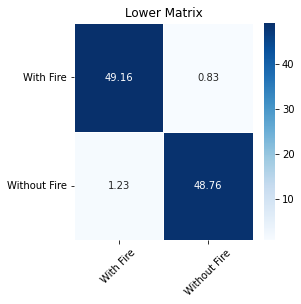

In [48]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Lower Matrix')
ax = sns.heatmap(lower_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

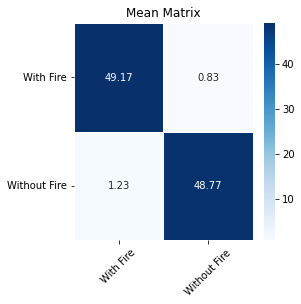

In [49]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Mean Matrix')
ax = sns.heatmap(mean_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

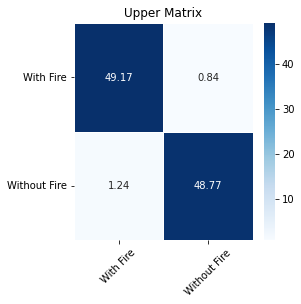

In [50]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Upper Matrix')
ax = sns.heatmap(upper_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

# Tensorflow Lite Metrics

In [ ]:
data = read_file(f'results/accs.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= accs =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

In [ ]:
data = read_file(f'results/tflite-times.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= times =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

In [ ]:
data = read_file(f'results/tflite-precisions.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= precisions =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

In [ ]:
data = read_file(f'results/tflite-recalls.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= recalls =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

In [ ]:
data = read_file(f'results/tflite-f1s.txt')

mean = np.mean(data)
lower, upper = st.t.interval(alpha=.95, df=len(data)-1, loc=mean, scale=st.sem(data))

print('= f1s =\n')
print(f'lower: {lower:.3f}\nmean: {mean:.3f}\nupper: {upper:.3f}')

In [ ]:
mean_matrix, lower_matrix, upper_matrix = read_matrices('results/tflite-cms.txt')

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Lower Matrix')
ax = sns.heatmap(lower_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Mean Matrix')
ax = sns.heatmap(mean_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))

ax.set_title('Upper Matrix')
ax = sns.heatmap(upper_matrix, annot=True, fmt=".2f", linewidths=.5, 
        yticklabels=['With Fire', 'Without Fire'], xticklabels=['With Fire', 'Without Fire'], cmap=plt.cm.Blues)
        
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
plt.show()